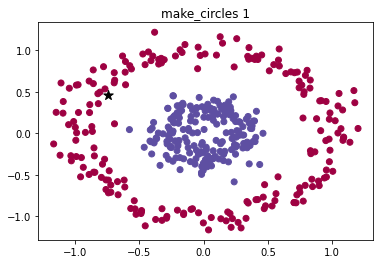

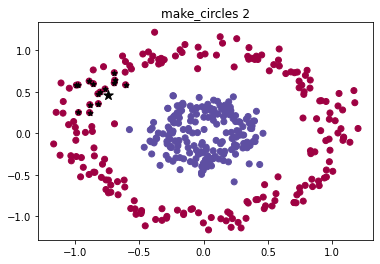

In [109]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import random

def KNN(inX,x,y,k):
    d = x - inX
    dist = (d**2).sum(axis=1)**0.5 # 计算欧几里得距离
    distance = dist.argsort() # 小到大排序
    result = np.argmax(np.bincount(y[distance[:k]])) 
    #argmax用于返回一个 numpy 数组中最大值的索引值
    #bincount用于统计一个非负的list或array中元素出现的次数
    return result,distance[:k]

    
fig = plt.figure(1)
x1, y1 = make_circles(n_samples=400, factor=0.3, noise=0.1)
# datasets.make_circles()用来生成圆圈状的二维样本.
# factor表示里圈和外圈的距离之比.
# 每圈共有n_samples/2个点.

#训练过程
k = 15

inX = -1+2*np.random.random(2) #生成一行两列的np数组，数据范围为[-1,1]
result,neighbors = KNN(inX,x1,y1,k)

#画图
plt.title('make_circles 1')
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1,cmap='Spectral')    
plt.scatter(inX[0],inX[1],marker='*',s=100,c='black')  
plt.show()

plt.title('make_circles 2') 
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1,cmap='Spectral')    
plt.scatter(inX[0],inX[1],marker='*',s=100,c='black')  
plt.scatter(x1[:,0][neighbors],x1[:,1][neighbors], marker='*', s=30,c='black')
plt.show() 

K: 1
Test Accuracy 0.96
K: 2
Test Accuracy 0.9466666666666667
K: 3
Test Accuracy 0.96
K: 4
Test Accuracy 0.96
K: 5
Test Accuracy 0.9666666666666667
K: 6
Test Accuracy 0.96
K: 7
Test Accuracy 0.9666666666666667
K: 8
Test Accuracy 0.9666666666666667
K: 9
Test Accuracy 0.9666666666666667
K: 10
Test Accuracy 0.9733333333333334
K: 11
Test Accuracy 0.9733333333333334
K: 12
Test Accuracy 0.96
K: 13
Test Accuracy 0.9666666666666667
K: 14
Test Accuracy 0.9733333333333334
K: 15
Test Accuracy 0.9733333333333334
K: 16
Test Accuracy 0.9666666666666667
K: 17
Test Accuracy 0.9733333333333334
K: 18
Test Accuracy 0.9733333333333334
K: 19
Test Accuracy 0.98
K: 20
Test Accuracy 0.98


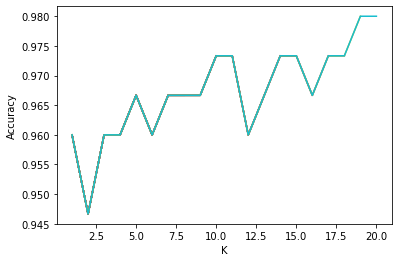

In [140]:
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  LeaveOneOut

iris =load_iris()
data = iris.data
target = iris.target
gap = LeaveOneOut() # 分割数据集
K = []
Ac = []
for k in range(1, 21):
    correct = 0
    knn = KNeighborsClassifier(k)
    for train,test in gap.split(X):
        knn.fit(X[train], y[train]) # 训练
        y_sample = knn.predict(X[test])
        if y_sample == y[test]:
            correct += 1
    Ac.append(correct/len(data))
    K.append(k)
    plt.plot(K,Ac)        
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    print("K:",k)
    print("Test Accuracy",correct/len(data))
    
plt.show()